In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
features = pd.read_csv("C:/diabetes.csv")
data=pd.DataFrame(data=features)

In [7]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
X = data.iloc[:,0:8].values
y = data.iloc[:,8].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [12]:
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                90        
                                                                 
 dense_5 (Dense)             (None, 8)                 88        
                                                                 
 dense_6 (Dense)             (None, 6)                 54        
                                                                 
 dense_7 (Dense)             (None, 2)                 14        
                                                                 
Total params: 246
Trainable params: 246
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
20/20 [==============================] - 1s 20ms/step - loss: 0.6831 - accuracy: 0.6401 - val_loss: 0.6150 - val_accuracy: 0.6948
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.6401 - val_loss: 0.6196 - val_accuracy: 0.6948
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.6401 - val_loss: 0.6560 - val_accuracy: 0.6948
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.6401 - val_loss: 0.6151 - val_accuracy: 0.6948
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6625 - accuracy: 0.6401 - val_loss: 0.6601 - val_accuracy: 0.6948
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.6401 - val_loss: 0.6244 - val_accuracy: 0.6948
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6583 - accuracy: 0.6401 - val_loss: 0.6244 - val_accuracy: 0.6948
Epoch 8/100


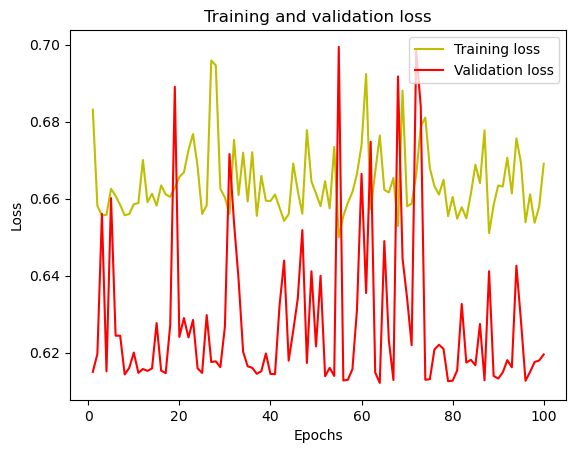

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

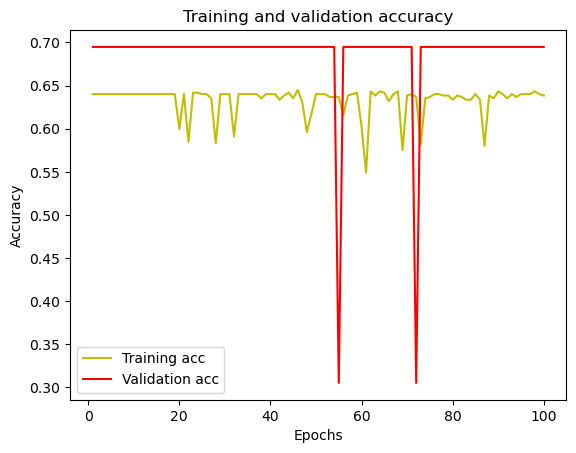

In [18]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.70      0.97      0.82       107
           1       0.50      0.06      0.11        47

    accuracy                           0.69       154
   macro avg       0.60      0.52      0.46       154
weighted avg       0.64      0.69      0.60       154

[[104   3]
 [ 44   3]]


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
data1=data.drop('Outcome',axis=1)

In [27]:
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [39]:
Z = data1.drop(['BMI'], axis=1).values
d = data1['BMI'].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
d1 = encoder.fit_transform(d)

D = pd.get_dummies(d1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(Z,D,test_size=0.2,random_state=0) 

In [40]:
D

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [41]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (7,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                512       
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [43]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 1s 15ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0050 - 

In [44]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.0044 - mse: 0.0044


[0.004400522448122501, 0.004400522448122501]

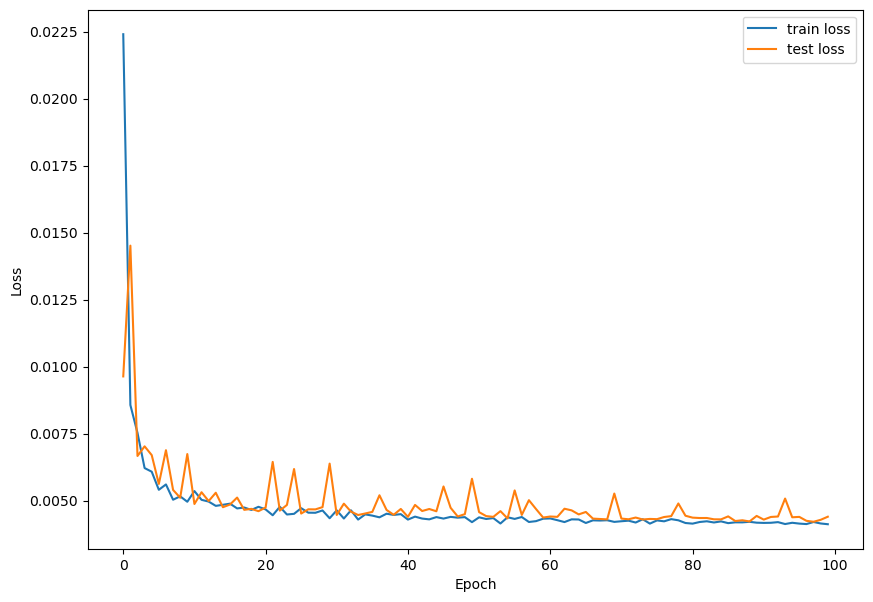

In [45]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

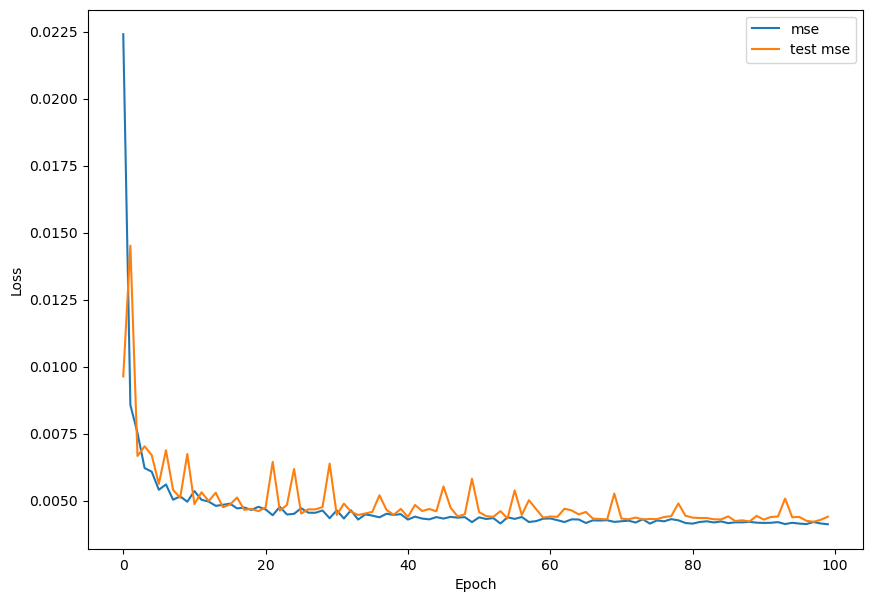

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()